<a href="https://colab.research.google.com/github/Wishy-S/LearningML/blob/master/EDA_InsuranceClaimPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv("/content/insurance2.csv")
df1=pd.read_csv("/content/insurance3r2.csv")

In [5]:
df.shape

(1338, 9)

# **EDA**

In [6]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


###### Checking for missing values

In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

### checking number of unique values, there is any cardinality in categorical features

In [8]:
L=['sex','region','children','smoker']
for i in L:
    print("{} has {} unique values".format(i,df[i].unique()))

sex has [0 1] unique values
region has [3 2 1 0] unique values
children has [0 1 3 2 5 4] unique values
smoker has [1 0] unique values


##### Since cardinality is fine so checking with data distribution of continous variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


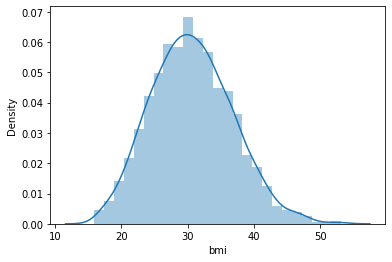

In [9]:
sns.distplot(df["bmi"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


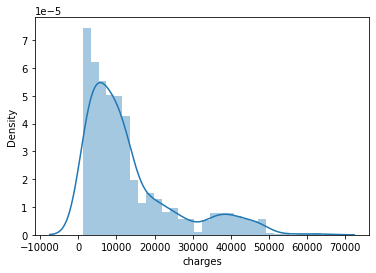

In [11]:
sns.distplot(df["charges"])

#### Since, charges is right skewed so we will do some normalization technique to make it a gaussian distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


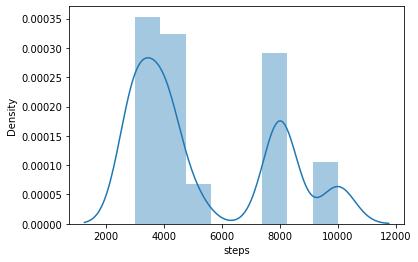

In [12]:
sns.distplot(df['steps'])

### **Checking the Correlation of attributes**

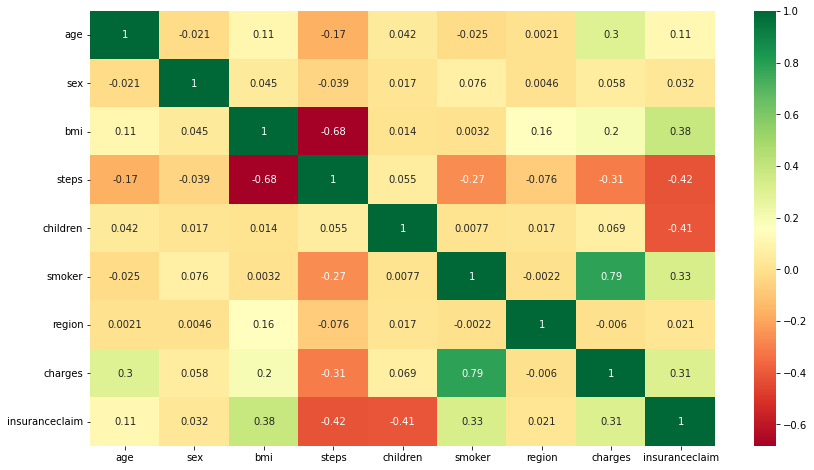

In [84]:
#Plotting correlation
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,8))
#To plot heatmap
import seaborn as sns
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### **Checking if dataset is imbalanced**

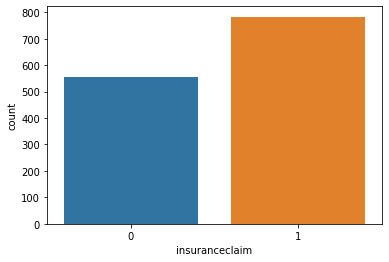

In [13]:
sns.countplot(x='insuranceclaim',data=df)

#### Checking for Outliers

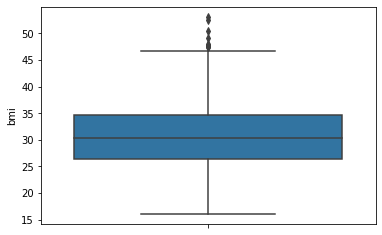

In [15]:
sns.boxplot(y=df['bmi'])

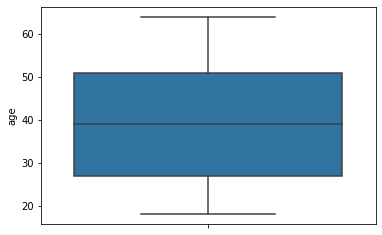

In [16]:
sns.boxplot(y=df['age'])

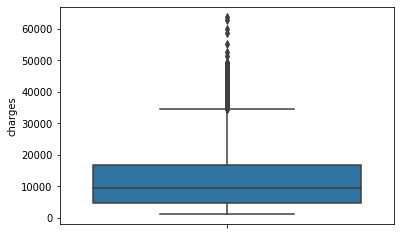

In [17]:
sns.boxplot(y=df['charges'])

## Feature Engineering

In [18]:
lower_limit=df['bmi'].mean()- 3* df['bmi'].std()
upper_limit=df['bmi'].mean()+ 3* df['bmi'].std()

In [19]:
print(upper_limit), print(lower_limit)

48.95795759602359
12.368836125949485


(None, None)

In [20]:
df.loc[df['bmi']>=48,'bmi']=48

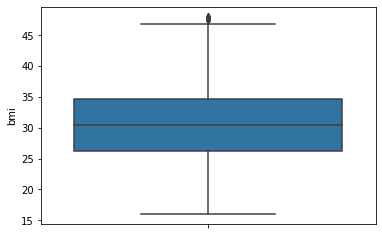

In [21]:
sns.boxplot(y=df['bmi'])

#### Bmi was having a gaussian distribution and was having outliers in order to handle that we replaced the values after the 3rd standard mean with the upper limit as calculated in order to overcome the impcat of outliers

In [22]:
IQR=df.charges.quantile(0.75)-df.charges.quantile(0.25)
IQR

11899.625365

In [23]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [24]:
lower_limit=df['charges'].quantile(0.25)-(IQR*3)
upper_limit=df['charges'].quantile(0.75)+(IQR*3)
print(lower_limit), print(upper_limit)

-30958.588945
52338.78861


(None, None)

In [25]:
df.loc[df['charges']>=52338,'charges']=52338

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


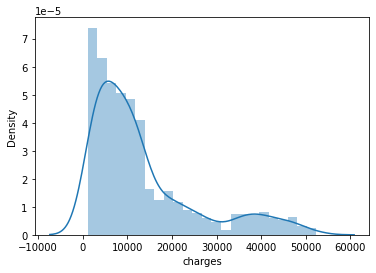

In [26]:
sns.distplot(df['charges'])

#### 'Charges' was having a skewed00000 distribution and was having outliers in order to handle that we replaced the values after 523338 with the upper limit as calculated in order to overcome the impact of outliers.

# Model Built

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier


## **Using Logistic Regression**

In [28]:
N = df.shape[1];
X_train,x_test,Y_train,y_test=train_test_split(df.iloc[:, :N-1],df.iloc[:,-1],test_size=0.20)

In [29]:
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(x_test)


accuracy = accuracy_score(y_test,y_pred)
classreport = classification_report(y_test,y_pred)
confusnMatrix = confusion_matrix(y_test,y_pred)
print('The accuracy: {}'.format(accuracy))
print('The Classification Report:\n {}'.format(classreport))
print('The Confusion Matrix:\n {}'.format(confusnMatrix))

The accuracy: 0.746268656716418
The Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.57      0.66       115
           1       0.73      0.88      0.80       153

    accuracy                           0.75       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.75      0.75      0.74       268

The Confusion Matrix:
 [[ 66  49]
 [ 19 134]]


## **Using Random Forest Classifier**

In [30]:
dff = df.copy()
dff = dff.drop("region",axis=1)
dff.head()
cl = dff.shape[1]
X_train,x_test,Y_train,y_test=train_test_split(df.iloc[:, :cl-1],df.iloc[:,-1],test_size=0.25)

In [33]:
from sklearn.metrics import classification_report
from sklearn import metrics

random_clf = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=25, criterion='entropy')
random_clf.fit(X_train,Y_train)
random_clf_predict = random_clf.predict(x_test)

random_clf_report = classification_report(y_test,random_clf_predict)
print(random_clf_report)
print("Accuracy:",metrics.accuracy_score(y_test, random_clf_predict))
confusnMatrix = confusion_matrix(y_test,random_clf_predict)
print(confusnMatrix)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       133
           1       0.98      0.97      0.98       202

    accuracy                           0.97       335
   macro avg       0.97      0.97      0.97       335
weighted avg       0.97      0.97      0.97       335

Accuracy: 0.9701492537313433
[[129   4]
 [  6 196]]


Text(0.5, 0, 'False Positive Rate')

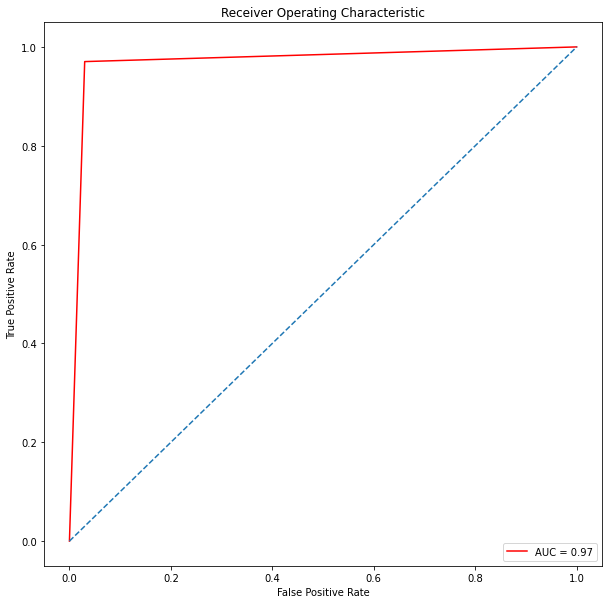

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,random_clf_predict)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## **Using Support Vector Machine Classifier**

In [177]:
dff = df.copy()
dff.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [268]:
cl = df2.shape[1]
X_train,x_test,Y_train,y_test=train_test_split(df2.iloc[:, :cl-1],df2.iloc[:,-1],test_size=0.20)

svm_clf = SVC(kernel="poly",degree=2)
svm_clf.fit(X_train,Y_train)
y_predict_svm = svm_clf.predict(x_test)
svm_clf_report = classification_report(y_test,y_predict_svm)
print("Accuracy:",metrics.accuracy_score(y_test,y_predict_svm))
print(svm_clf_report)

In [389]:
df2 = df1.copy()
df2.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [364]:
print(df2.loc[df2['insuranceclaim']==1].count())
print(df2.loc[df2['insuranceclaim']==0].count())
783-555

age               783
sex               783
bmi               783
steps             783
children          783
smoker            783
region            783
charges           783
insuranceclaim    783
dtype: int64
age               555
sex               555
bmi               555
steps             555
children          555
smoker            555
region            555
charges           555
insuranceclaim    555
dtype: int64


228

In [52]:
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train,Y_train)
y_predict_svm = svm_clf.predict(x_test)
svm_clf_report = classification_report(y_test,y_predict_svm)
print("Accuracy:",metrics.accuracy_score(y_test,y_predict_svm))
print(svm_clf_report)

Accuracy: 0.9044776119402985
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       133
           1       0.92      0.93      0.92       202

    accuracy                           0.90       335
   macro avg       0.90      0.90      0.90       335
weighted avg       0.90      0.90      0.90       335



In [395]:
x_test=pd.DataFrame
y_test=pd.DataFrame
k = 228
N = df2.shape[1];
for index, d in df2.iterrows():
  if d['insuranceclaim'] == 1:
    x_test.append(df2.iloc[])
    y_test.append(1)
    df2.drop(index,inplace=True)
    k-=1

  #print(i)
  if k==0:
    break

TypeError: ignored